In [20]:
#On commence par importer l'ensemble des package qui nous seront utile pour la suite et définir les paramètre de figure

import pandas as pd
import numpy as np                  
import matplotlib.pyplot as plt     
import math                         
import seaborn as sns             
import time
plt.rcParams["figure.figsize"]=(10, 6)

In [21]:
#On importe le jeu de données household_power_consumption.txt dans la variable “Global_active_power”

household_power_consumption = pd.read_csv('Oualid ZEJLI_household_power_consumption.txt', sep=';', parse_dates={'dt':['Date','Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'], index_col='dt')
household_power_consumption.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


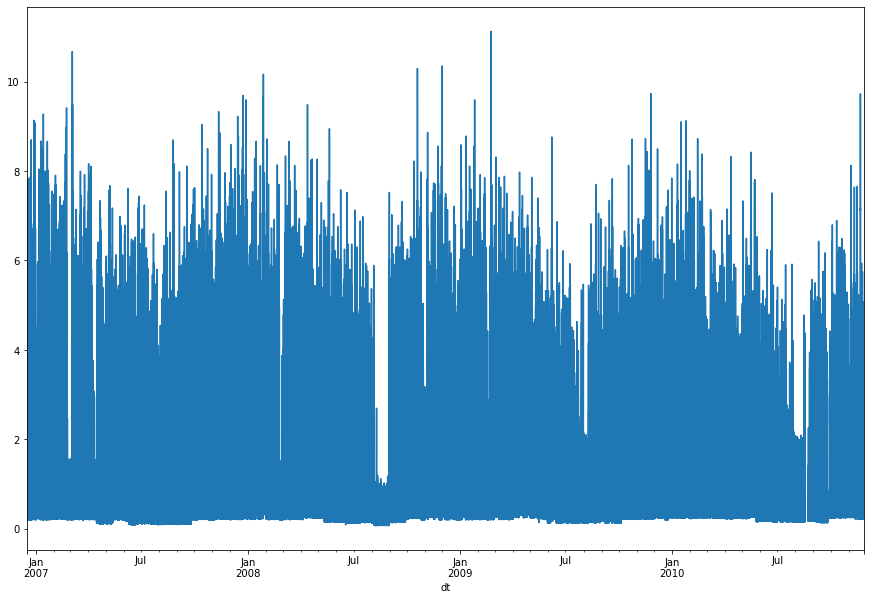

In [22]:
#On propose une visualisation de la puissance sur la période d'étude

household_power_consumption['Global_active_power'].plot(figsize=(15,10));

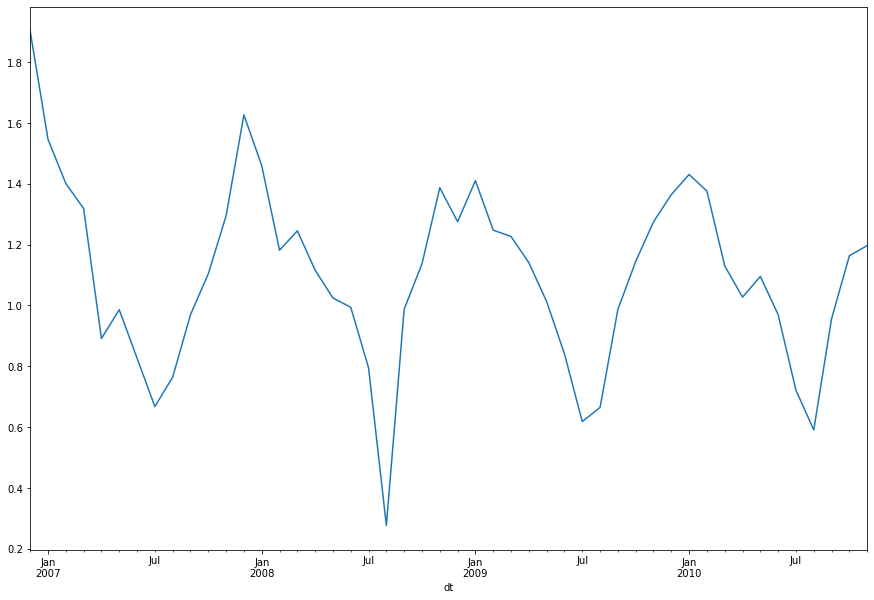

In [23]:
#On donne une représentation par mois de la puissance

household_power_consumption['Global_active_power'].resample('M').mean().plot(figsize=(15,10));

In [ ]:
#Etude de stationnarité

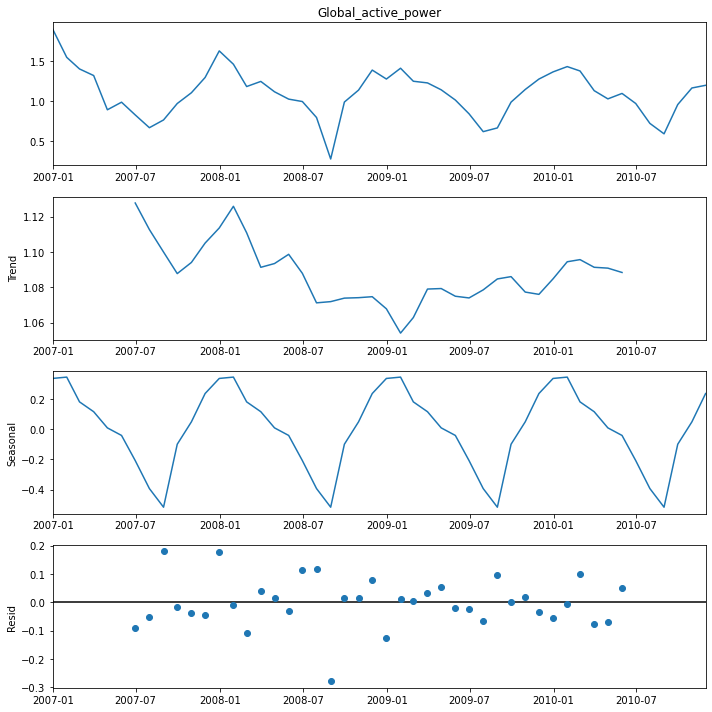

In [24]:
#Decomposition de la serie

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"]=(10, 10)

x = household_power_consumption['Global_active_power'].resample('M').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

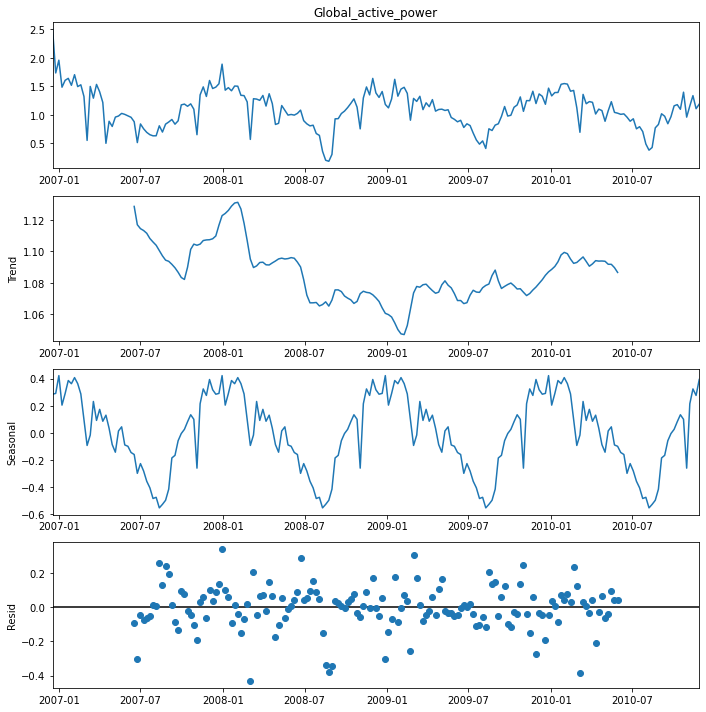

In [33]:
#On change de frequence d'echantillonage à la semaine

x = household_power_consumption['Global_active_power'].resample('w').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

In [38]:
#Utiliser le score de Dickey-Fuller

from statsmodels.tsa.stattools import adfuller

x = household_power_consumption['Global_active_power'].resample('w').mean()

x

dt
2006-12-17    2.505248
2006-12-24    1.734186
2006-12-31    1.958376
2007-01-07    1.484233
2007-01-14    1.604954
                ...   
2010-10-31    0.958963
2010-11-07    1.154565
2010-11-14    1.335928
2010-11-21    1.107106
2010-11-28    1.186756
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

In [39]:
adfuller(x.diff(1).dropna())[1]

5.6479648052164364e-14

In [40]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [41]:
#Codage de la fonction d'autocorellation par semaine

x = household_power_consumption['Global_active_power'].dropna().resample('w').mean()


def autocov(x,l):
    m=x.mean()
    n=len(x)
    tmp=0
    for j in range(0, n-l):
        tmp=tmp+(x[j]-m)*(x[j+l]-m)
    return tmp/n


def autocov0(x):
    m=x.mean()
    n=len(x)
    tmp=0
    for j in range(0, n):
        tmp=tmp+(x[j]-m)*(x[j]-m)
    return tmp/n

def auto_correlation(x,j):
    return autocov(x,j)/autocov0(x)

auto_correlation(x,1),auto_correlation(x,2)

(0.7256296232272522, 0.6539354103575749)

In [42]:
#Calcul de l'auocorellation

import statsmodels.api as sm

sm.tsa.acf(x,nlags=2)

/Users/oualidzejli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.72562962, 0.65393541])

In [43]:
#On verifie nos calculs avec la fonction acf()

acf(x)[1],acf(x)[2]

/Users/oualidzejli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


(0.7256296232272512, 0.6539354103575744)

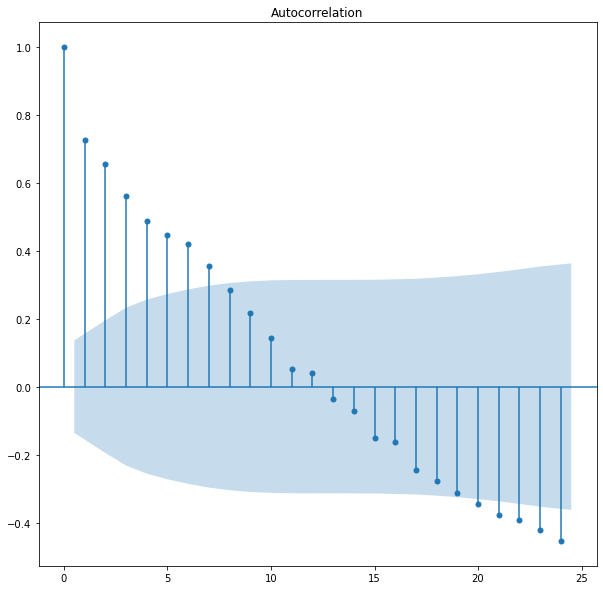

In [44]:
#Analyse des autocorrelogrammes

a=plot_acf(x)

In [ ]:
#Modèle ARIMA

In [45]:
pip install statsmodels==0.12.2

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      

In [47]:
#On entraine avec toutes les observations sauf les 10 dernières pour évaluer le modele

import statsmodels.api as sm
x = household_power_consumption['Global_active_power'].resample('W').mean().dropna()

mod = sm.tsa.arima.ARIMA(x[:-10],order=(5, 1, 1))
                                
results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                  197
Model:                  ARIMA(5, 1, 1)   Log Likelihood                  25.767
Date:                 Mon, 30 May 2022   AIC                            -37.533
Time:                         15:28:42   BIC                            -14.587
Sample:                     12-17-2006   HQIC                           -28.243
                          - 09-19-2010                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4961      0.761     -0.652      0.514      -1.987       0.995
ar.L2         -0.1813      0.315     -0.577      0.564      -0.798       0.435
ar.L3         -0.1143      0.161     -0.711 

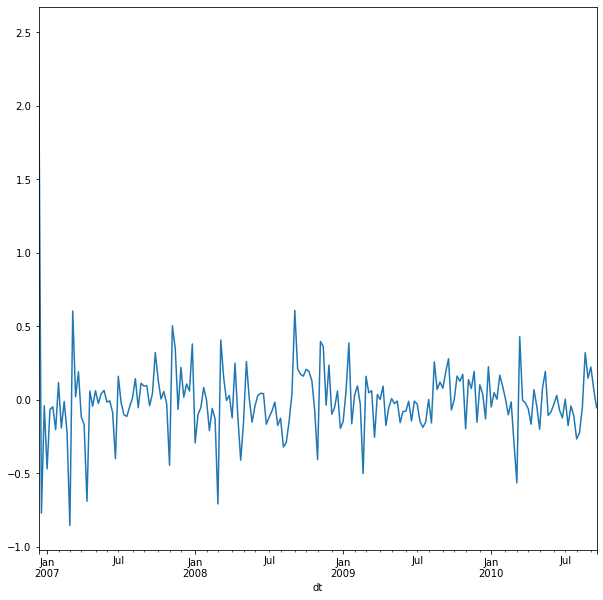

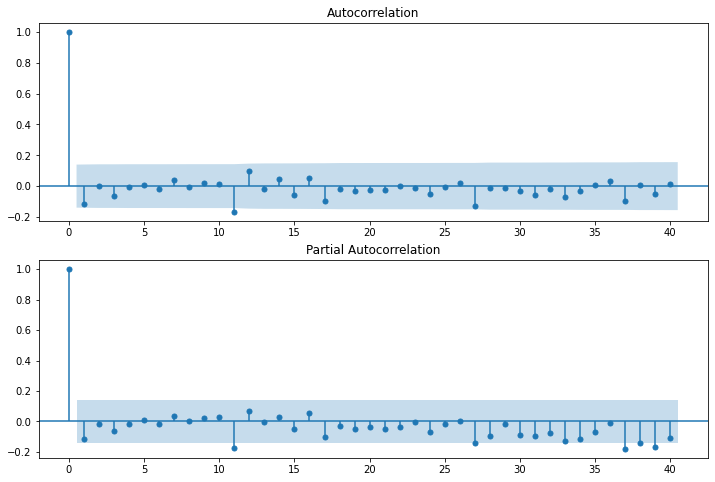

<AxesSubplot:ylabel='Density'>

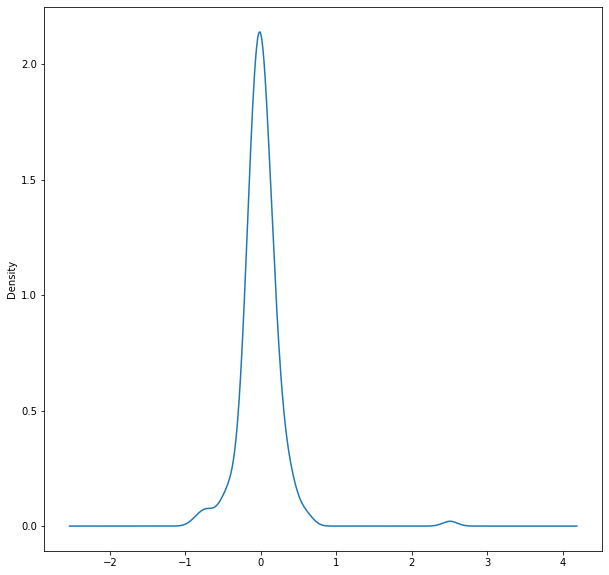

In [48]:
results.resid.plot()

plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

results.resid.plot(kind="kde")

In [52]:
#SARIMA

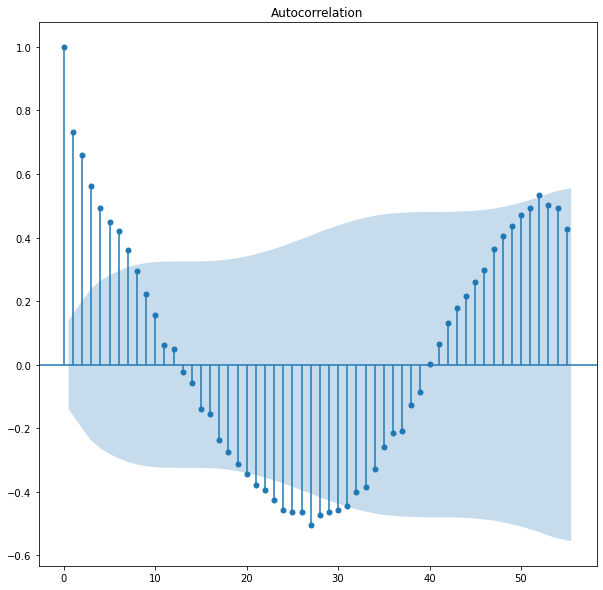

In [53]:
a=plot_acf(household_power_consumption['Global_active_power'].resample('w').mean().dropna()[:-10],lags=55)

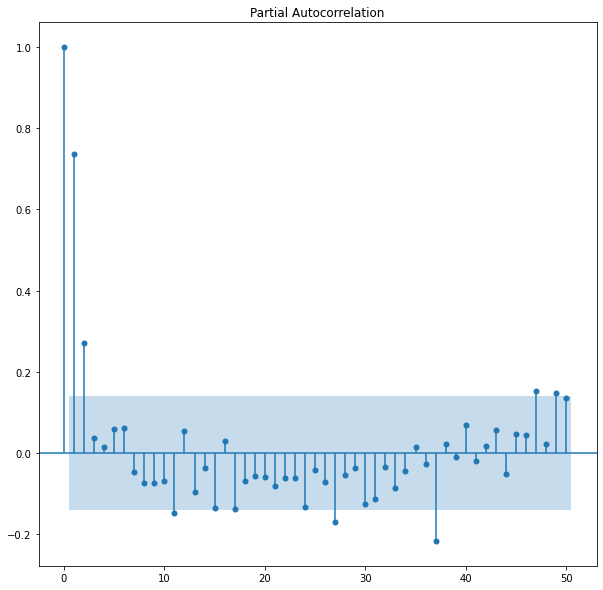

In [54]:
_=plot_pacf(household_power_consumption['Global_active_power'].resample('w').mean().dropna()[:-10],lags=50)

In [55]:
household_power_consumption['Global_active_power'].resample('w').mean().dropna()[:-10].diff(24).sum(),household_power_consumption['Global_active_power'].resample('w').mean().dropna()[:-10].diff(24).sum()

(-10.910578773224245, -10.910578773224245)

In [56]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(household_power_consumption['Global_active_power'].resample('w').mean().dropna()[:-10],
                                order=(5, 1, 1),
                                seasonal_order=(1, 1, 1, 26))
                                

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46872D-02    |proj g|=  8.37469D-01


 This problem is unconstrained.



At iterate    5    f= -1.03270D-02    |proj g|=  4.84974D-01

At iterate   10    f= -3.32359D-02    |proj g|=  4.32025D-02

At iterate   15    f= -3.69581D-02    |proj g|=  5.21689D-02

At iterate   20    f= -3.92311D-02    |proj g|=  7.16713D-03

At iterate   25    f= -3.93799D-02    |proj g|=  5.92558D-03

At iterate   30    f= -4.03222D-02    |proj g|=  1.13108D-02

At iterate   35    f= -4.08614D-02    |proj g|=  5.08186D-03

At iterate   40    f= -4.09534D-02    |proj g|=  8.55336D-03

At iterate   45    f= -4.10054D-02    |proj g|=  6.98567D-03

At iterate   50    f= -4.10787D-02    |proj g|=  5.58043D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/oualidzejli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                Global_active_power   No. Observations:                  197
Model:             SARIMAX(5, 1, 1)x(1, 1, 1, 26)   Log Likelihood                   8.093
Date:                            Mon, 30 May 2022   AIC                              1.815
Time:                                    15:58:28   BIC                             30.037
Sample:                                12-17-2006   HQIC                            13.267
                                     - 09-19-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1242      0.280     -4.010      0.000      -1.674      -0.575
ar.L2         -0.4886      0.141   

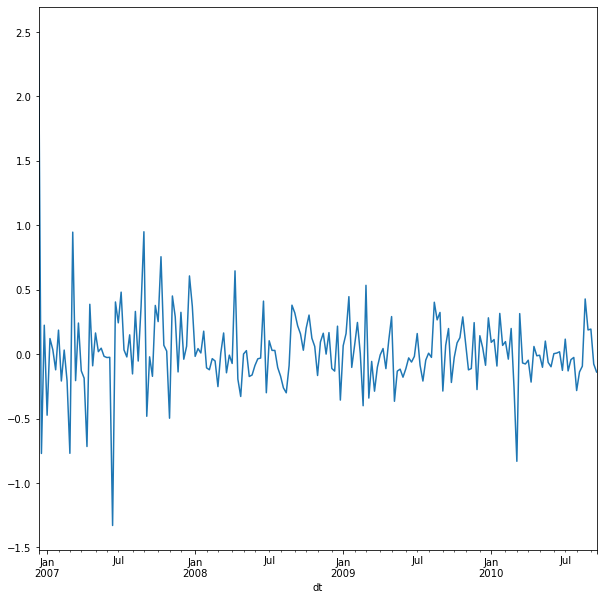

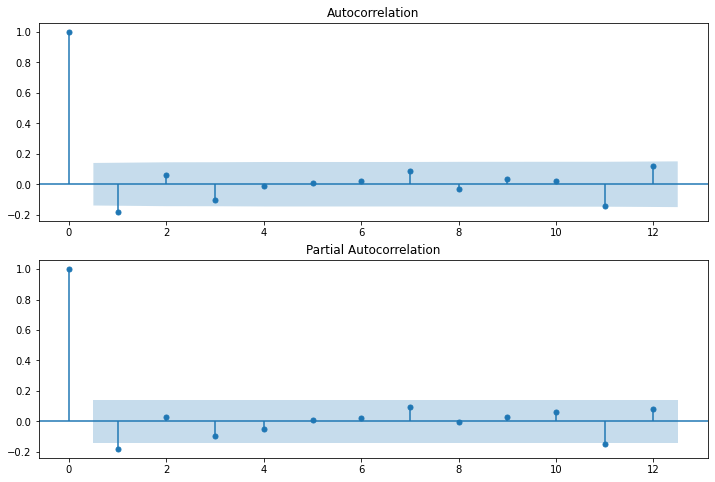

In [57]:
results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=12, ax=ax2)
plt.show()